In [577]:
import numpy as np
import pandas as pd
import calendar

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

In [578]:
#Read the csv imported file
df = pd.read_csv('pl.csv')

In [622]:
df.head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,tGoals,Month,Day
0,2017,2016-08-13,Burnley,Swansea,0,1,A,0,0,D,...,14,7,4,3,2,0,0,1,Aug,Sat
1,2017,2016-08-13,Crystal Palace,West Brom,0,1,A,0,0,D,...,15,3,6,2,2,0,0,1,Aug,Sat
2,2017,2016-08-13,Everton,Tottenham,1,1,D,1,0,H,...,14,5,6,0,0,0,0,2,Aug,Sat


In [624]:
#Convert to Date format
#df['Date'] = pd.to_datetime(df.Date)
#df.sort_values('Date').head(3)
df['Date'] = pd.to_datetime(df.Date)
df.sort_values(by = 'Date').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,tGoals,Month,Day
3837,2008,2007-01-09,Bolton,Everton,1,2,A,0,1,A,...,10,11,6,1,3,0,0,3,Jan,Tue
3839,2008,2007-01-09,Liverpool,Derby,6,0,H,2,0,H,...,14,4,2,0,1,0,0,6,Jan,Tue
3840,2008,2007-01-09,Man United,Sunderland,1,0,H,0,0,D,...,7,6,0,1,2,0,0,1,Jan,Tue


In [581]:
# Έλεγχος null καταχωρήσεων σε 3 φάσεις
df.isnull().values.any()

False

In [582]:
df.isnull().sum().head(3)

Season      0
Date        0
HomeTeam    0
dtype: int64

In [583]:
df.isnull().sum().sum()

0

In [584]:
# DataSet info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 23 columns):
Season      4180 non-null int64
Date        4180 non-null datetime64[ns]
HomeTeam    4180 non-null object
AwayTeam    4180 non-null object
FTHG        4180 non-null int64
FTAG        4180 non-null int64
FTR         4180 non-null object
HTHG        4180 non-null int64
HTAG        4180 non-null int64
HTR         4180 non-null object
Referee     4180 non-null object
HS          4180 non-null int64
AS          4180 non-null int64
HST         4180 non-null int64
AST         4180 non-null int64
HF          4180 non-null int64
AF          4180 non-null int64
HC          4180 non-null int64
AC          4180 non-null int64
HY          4180 non-null int64
AY          4180 non-null int64
HR          4180 non-null int64
AR          4180 non-null int64
dtypes: datetime64[ns](1), int64(17), object(5)
memory usage: 751.2+ KB


In [585]:
# All football teams that have played at least one season on Premier League
df['HomeTeam'].unique()

array(['Burnley', 'Crystal Palace', 'Everton', 'Hull', 'Man City',
       'Middlesbrough', 'Southampton', 'Arsenal', 'Bournemouth', 'Chelsea',
       'Man United', 'Leicester', 'Stoke', 'Swansea', 'Tottenham',
       'Watford', 'West Brom', 'Sunderland', 'West Ham', 'Liverpool',
       'Norwich', 'Newcastle', 'Aston Villa', 'QPR', 'Fulham', 'Cardiff',
       'Reading', 'Wigan', 'Blackburn', 'Bolton', 'Wolves', 'Brighton',
       'Huddersfield', 'Birmingham', 'Blackpool', 'Portsmouth', 'Derby'], dtype=object)

In [586]:
# The number of theese teams
df['HomeTeam'].nunique()

37

In [587]:
# Added a new column for totalGoal count of every match
df['tGoals'] = df['FTHG'] + df['FTAG']

In [588]:
##### Create new Column for month extracted from Date.
##### Create a new Column for day extracted from Date.

#time = df['Date'].iloc[0]
#time.month
df['Month'] = df['Date'].apply(lambda time: time.month)
df['Day'] = df['Date'].apply(lambda time: time.dayofweek)

In [589]:
# Assign 'Jan','Feb' etc for each one.
dmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['Month'] = df['Month'].map(dmap)

In [590]:
# Same for Days.
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day'] = df['Day'].map(dmap)

In [591]:
# Show all columns
df.columns

Index(['Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'tGoals', 'Month', 'Day'],
      dtype='object')

In [592]:
# Index info
df.index

RangeIndex(start=0, stop=4180, step=1)

In [593]:
# Show the first 3 lines of dataframe
df.head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,tGoals,Month,Day
0,2017,2016-08-13,Burnley,Swansea,0,1,A,0,0,D,...,14,7,4,3,2,0,0,1,Aug,Sat
1,2017,2016-08-13,Crystal Palace,West Brom,0,1,A,0,0,D,...,15,3,6,2,2,0,0,1,Aug,Sat
2,2017,2016-08-13,Everton,Tottenham,1,1,D,1,0,H,...,14,5,6,0,0,0,0,2,Aug,Sat


In [594]:
# Show the last 3 lines of the dataframe
df.tail(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,tGoals,Month,Day
4177,2008,2008-11-05,Tottenham,Liverpool,0,2,A,0,0,D,...,9,8,4,1,1,0,0,2,Nov,Wed
4178,2008,2008-11-05,West Ham,Aston Villa,2,2,D,1,1,D,...,21,7,8,2,2,0,0,4,Nov,Wed
4179,2008,2008-11-05,Wigan,Man United,0,2,A,0,1,A,...,5,5,12,3,2,0,0,2,Nov,Wed


In [595]:
# Unique premier league seasons included.
df['Season'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2018, 2011, 2010, 2009, 2008])

In [596]:
# Total seasons inluded
df['Season'].nunique()

11

In [597]:
# Total number of games per season
df['Season'].value_counts().sort_index()

2008    380
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    380
2017    380
2018    380
Name: Season, dtype: int64

In [625]:
# Number of games per Month totally. Convert to DataFrame
# df['Month'].value_counts()
monthFrame = df['Month'].value_counts().to_frame(name='Games').reindex(list(calendar.month_abbr)).dropna().astype(int)
monthFrame

,Games
Jan,474
Feb,313
Mar,366
Apr,420
May,261
Jun,100
Jul,104
Aug,397
Sep,406
Oct,409


In [599]:
# Number of game per Day totally. Convert to Dataframe
dayFrame = df['Day'].value_counts().to_frame(name='Games').reindex(list(calendar.day_abbr))
dayFrame

,Games
Mon,304
Tue,337
Wed,436
Thu,274
Fri,235
Sat,1753
Sun,841


In [600]:
##### Total number of goals per season

#df.groupby('Season').sum().reset_index()
#df2 = df.groupby('Season').sum().reset_index()
df2 = df.groupby(['Season'])[["tGoals"]].sum().reset_index()
#df2.sort_values('totalGoals', ascending=False)
df2

,Season,tGoals
0,2008,1002
1,2009,942
2,2010,1053
3,2011,1063
4,2012,1066
5,2013,1063
6,2014,1052
7,2015,975
8,2016,1026
9,2017,1064


### Σύνολο γκολ ανα σαιζόν

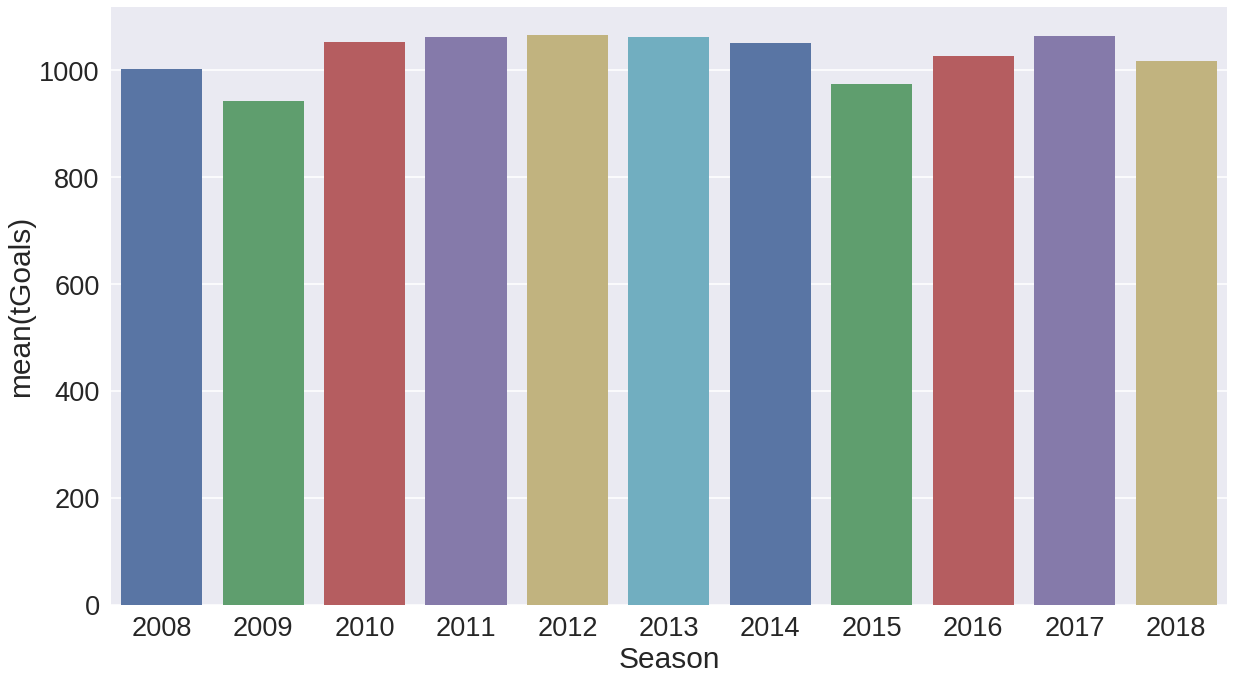

In [601]:
plt.figure(figsize=(20,11))
sns.set_context('poster',font_scale=1.7)
sns.barplot(x='Season', y='tGoals', data=df2, palette="deep")

### Μέσος όρος των γκολ ανα σαιζόν

In [602]:
######## Average number of goals per season

# ΠΕΡΙΛΑΜΒΑΝΕΤΑΙ ΤΑΞΙΝΟΜΗΣΗ ΤΟΥ ΑΠΟΤΕΛΕΣΜΑΤΟΣ. ΣΤΗΝ ΚΟΡΥΦΗ ΒΡΙΣΚΕΤΑΙ Η ΣΑΙΖΟΝ ΠΟΥ ΕΙΧΕ ΤΟΝ ΜΕΓΑΛΥΤΕΡΟ ΜΕΣΟ ΟΡΟ ΓΚΟΛ.
# ΣΤΗ ΣΥΓΚΕΚΡΙΜΕΝΗ ΠΕΡΙΠΤΩΣΗ Η ΣΑΙΖΟΝ 2011-12 ΕΙΧΕ ΤΟΝ ΜΕΓΑΛΥΤΕΡΟ ΜΕΣΟ ΟΡΟ ΓΚΟΛ ΜΕ 2,81 ΓΚΟΛ ΑΝΑ ΑΓΩΝΑ
df3 = df.groupby(['Season'])[["tGoals","HS"]].mean().reset_index()
#df3.sort_values('totalGoals', ascending=False)
df3

,Season,tGoals,HS
0,2008,2.64,12.85
1,2009,2.48,13.65
2,2010,2.77,13.73
3,2011,2.80,13.80
4,2012,2.81,14.53
5,2013,2.80,14.12
6,2014,2.77,14.96
7,2015,2.57,14.62
8,2016,2.70,14.31
9,2017,2.80,14.01


In [603]:
plt.figure(figsize=(20,11))
sns.set_context('poster',font_scale=1.7)
#sns.barplot(x='Season', y='totalGoals', data=df3, palette="colorblind")

In [604]:
# Total number of goals, all seasons added.
df['tGoals'].sum()

11324

In [605]:
# Average number of goals, all seasons included
df['tGoals'].mean()

2.709090909090909

In [606]:
# Show games in which the HomeTeam has scored more than 6 goals. Limit 3 first.
df.query('FTHG >= 6').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,tGoals,Month,Day
71,2017,2016-10-15,Bournemouth,Hull,6,1,H,3,1,H,...,14,5,4,0,3,0,0,7,Oct,Sat
108,2017,2016-06-11,Liverpool,Watford,6,1,H,3,0,H,...,10,6,3,1,2,0,0,7,Jun,Sat
232,2017,2017-04-02,Everton,Bournemouth,6,3,H,3,0,H,...,4,4,8,3,1,0,0,9,Apr,Sun


In [607]:
# Show games in which the AwayTeam has scored more than 6 goals. Limit 3 first.
df.query('FTAG >= 6').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,tGoals,Month,Day
369,2017,2017-05-18,Leicester,Tottenham,1,6,A,0,2,A,...,8,4,4,3,1,0,0,7,May,Thu
373,2017,2017-05-21,Hull,Tottenham,1,7,A,0,3,A,...,5,2,3,0,0,0,0,8,May,Sun
638,2016,2016-02-14,Aston Villa,Liverpool,0,6,A,0,2,A,...,9,0,6,3,1,0,0,6,Feb,Sun


In [608]:
####### Show all Home games of a specific team, function.

# df.loc[(df['HomeTeam'] == 'Liverpool' )]
home_team = lambda x: df.loc[(df['HomeTeam'] == x)]

In [609]:
home_team('Liverpool').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,tGoals,Month,Day
33,2017,2016-10-09,Liverpool,Leicester,4,1,H,2,1,H,...,8,1,7,1,2,0,0,5,Oct,Sun
52,2017,2016-09-24,Liverpool,Hull,5,1,H,3,0,H,...,8,13,2,1,2,0,1,6,Sep,Sat
79,2017,2016-10-17,Liverpool,Man United,0,0,D,0,0,D,...,20,3,1,0,4,0,0,0,Oct,Mon


In [610]:
####### Show all Away games of a specific team, function.


# df.loc[(df['HomeTeam'] == 'Leicester' )]
away_team = lambda x: df.loc[(df['AwayTeam'] == x)]

In [611]:
away_team('Chelsea').head(4)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,tGoals,Month,Day
16,2017,2016-08-20,Watford,Chelsea,1,2,A,0,0,D,...,10,0,5,4,3,0,0,3,Aug,Sat
38,2017,2016-11-09,Swansea,Chelsea,2,2,D,0,1,A,...,8,1,11,3,4,0,0,4,Nov,Wed
50,2017,2016-09-24,Arsenal,Chelsea,3,0,H,3,0,H,...,11,9,1,0,2,0,0,3,Sep,Sat
61,2017,2016-01-10,Hull,Chelsea,0,2,A,0,0,D,...,15,5,7,2,2,0,0,2,Jan,Sun


In [612]:
#### Show all games, of a specific team on a specific season.

#df.query('HomeTeam == "Liverpool" | AwayTeam == "Liverpool" ')
df.loc[((df['HomeTeam'] == 'Liverpool') | (df['AwayTeam'] == 'Liverpool')) & (df['Season'] == 2016 ) ].head(4)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,tGoals,Month,Day
388,2016,2015-09-08,Stoke,Liverpool,0,1,A,0,0,D,...,16,3,5,2,4,0,0,1,Sep,Tue
399,2016,2015-08-17,Liverpool,Bournemouth,1,0,H,1,0,H,...,18,6,8,1,4,0,0,1,Aug,Mon
409,2016,2015-08-24,Arsenal,Liverpool,0,0,D,0,0,D,...,13,7,8,1,4,0,0,0,Aug,Mon
413,2016,2015-08-29,Liverpool,West Ham,0,3,A,0,2,A,...,11,5,7,3,1,1,1,3,Aug,Sat


In [613]:
##### Show all game that happened on a specific date, function

#df.loc[(df['Date'] == '24/09/16' )]
specific_date = lambda x: df.loc[(df['Date'] == x )]

In [614]:
specific_date('24/09/16')

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,tGoals,Month,Day
50,2017,2016-09-24,Arsenal,Chelsea,3,0,H,3,0,H,...,11,9,1,0,2,0,0,3,Sep,Sat
51,2017,2016-09-24,Bournemouth,Everton,1,0,H,1,0,H,...,14,5,3,2,2,0,0,1,Sep,Sat
52,2017,2016-09-24,Liverpool,Hull,5,1,H,3,0,H,...,8,13,2,1,2,0,1,6,Sep,Sat
53,2017,2016-09-24,Man United,Leicester,4,1,H,4,0,H,...,12,8,6,0,2,0,0,5,Sep,Sat
54,2017,2016-09-24,Middlesbrough,Tottenham,1,2,A,0,2,A,...,9,2,10,2,1,0,0,3,Sep,Sat
55,2017,2016-09-24,Stoke,West Brom,1,1,D,0,0,D,...,13,6,6,3,4,0,0,2,Sep,Sat
56,2017,2016-09-24,Sunderland,Crystal Palace,2,3,A,1,0,H,...,12,3,5,0,2,0,0,5,Sep,Sat
57,2017,2016-09-24,Swansea,Man City,1,3,A,1,1,D,...,9,2,7,2,4,0,0,4,Sep,Sat


In [615]:
#### Show the games between 2 specific teams.

#df.loc[(df['HomeTeam'] == 'Liverpool' & ['AwayTeam'] == 'Leicester')]
#df.query('HomeTeam == "Liverpool" & AwayTeam == "Hull" ')
home_away = lambda x,y: df.loc[(df['HomeTeam'] == x) & (df['AwayTeam'] == y)]

In [616]:
home_away('Hull','Liverpool').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,tGoals,Month,Day
233,2017,2017-04-02,Hull,Liverpool,2,0,H,1,0,H,...,12,1,15,2,1,0,0,2,Apr,Sun
1097,2015,2015-04-28,Hull,Liverpool,1,0,H,1,0,H,...,10,7,7,2,0,0,0,1,Apr,Tue
1267,2014,2013-01-12,Hull,Liverpool,3,1,H,1,1,D,...,16,2,6,2,0,0,0,4,Jan,Sat


In [617]:
#Totan number of games, each referee had.
df['Referee'].value_counts().head(5)

M Dean           321
M Atkinson       301
A Marriner       267
M Clattenburg    233
L Mason          226
Name: Referee, dtype: int64

# TESTING AREA

In [618]:
## Organize 
#byMonth = df.groupby('Month').count()
#byMonth
#byMonth.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#byMonth.reindex(list(calendar.month_abbr)).dropna()

In [619]:
#df.drop(['Date','Season'], axis=1)
#df[[i for i in list(df.columns) if i != 'HomeTeam']]
#df[['HomeTeam','AwayTeam']]

In [635]:
#df.loc[((df['HomeTeam'] == 'Liverpool') | (df['AwayTeam'] == 'Liverpool')) & (df['Season'] == 2016 ) ].head(4)
#df.groupby('HomeTeam').count()
#df.groupby(['AwayTeam','HomeTeam'])[["FTAG"]].sum().reset_index()

In [636]:
df.head(5)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,tGoals,Month,Day
0,2017,2016-08-13,Burnley,Swansea,0,1,A,0,0,D,...,14,7,4,3,2,0,0,1,Aug,Sat
1,2017,2016-08-13,Crystal Palace,West Brom,0,1,A,0,0,D,...,15,3,6,2,2,0,0,1,Aug,Sat
2,2017,2016-08-13,Everton,Tottenham,1,1,D,1,0,H,...,14,5,6,0,0,0,0,2,Aug,Sat
3,2017,2016-08-13,Hull,Leicester,2,1,H,1,0,H,...,17,5,3,2,2,0,0,3,Aug,Sat
4,2017,2016-08-13,Man City,Sunderland,2,1,H,1,0,H,...,14,9,6,1,2,0,0,3,Aug,Sat


In [ ]:
### TESTING
df['Color'] = np.where(df['HomeTeam']=='Liverpool', 'green', 'red')
def set_color(row):
    if row["HomeTeam"] == "Liverpool" or row["AwayTeam"] == "Liverpool":
        return "red"
    else:
        return "green"

df2 = df.assign(color=df.apply(set_color, axis=1))

In [647]:
testdf = df[['HomeTeam','AwayTeam','FTHG','FTAG']]
testdf.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG
0,Burnley,Swansea,0,1
1,Crystal Palace,West Brom,0,1
2,Everton,Tottenham,1,1
3,Hull,Leicester,2,1
4,Man City,Sunderland,2,1


In [652]:
testdf.groupby(['FTHG', 'FTAG']).size().groupby(level=1).max()

FTAG
0    433
1    452
2    274
3    115
4     44
5     13
6      5
7      1
dtype: int64